In [1]:
# The following is a famous dataset on the sunk giant ship of Titanic, which holds a story in itself. There was a  great amass of lifeloss .
# Now let us from the available sources of data try to figure out the people that got killed belonged to and that who got saved. what could have been better measures adopted in that to see the minimal death rate.
# Also arrive ata conclusion.

### Here the ultimate response variable  is to see if the person will be killed or not for a later  new data if tried on the developed model : obained from the trained data. 



In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading the test and train files of the titanic dataset

train_titanic = pd.read_csv('C:/Users/Prajwal Sri Vatsa/Downloads/train_Titanic.csv')
test_titanic = pd.read_csv("C:/Users/Prajwal Sri Vatsa/Downloads/test_Titanic.csv")

## Just checking for the structure of the data

In [4]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Removing the column "Cabin" from each of the records of the test and train .
train_titanic = train_titanic.drop('Cabin', axis = 1)
test_titanic = test_titanic.drop('Cabin', axis = 1)

In [7]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [9]:
# Getting an insight of the dtypes of each column to categorize .
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [10]:
# We see that Age has some values . 
print('so the number of null values in the age column of test set is:{}'.format(test_titanic.Age.isnull().sum()))


so the number of null values in the age column of test set is:86


In [11]:
# performing the same functionality on train_itanic set we see the following:
train_titanic.info()
print('So the number of null values in the age column of train_titanic set is:{}'.format(train_titanic.Age.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB
So the number of null values in the age column of train_titanic set is:177


In [12]:
# categorized the numerical and categorical values 
categorical = train_titanic[['Name', 'Sex','Embarked', 'Ticket']]
Numerical = train_titanic[['PassengerId', 'Survived', 'Fare', 'Age', 'Parch', 'SibSp', 'Pclass']]


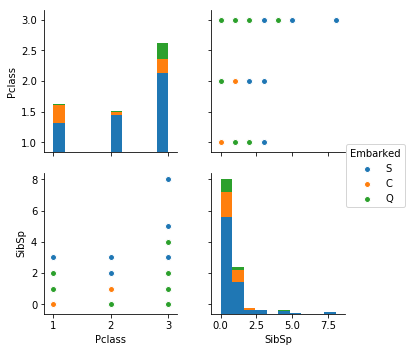

In [13]:
data = train_titanic[['Pclass', 'SibSp', 'Embarked']]
sns.pairplot(data, hue = 'Embarked' )

In [14]:
print('Number of people embarking in Southampton (S):{}'.format(train_titanic[train_titanic['Embarked'] == 'S'].shape[0]))

Number of people embarking in Southampton (S):644


In [15]:
print('Number of people embarking in Cherbourg (C):{}'.format(train_titanic[train_titanic['Embarked'] == 'C'].shape[0]))

Number of people embarking in Cherbourg (C):168


In [16]:
print('Number of people embarking in Queenstown (Q):{}'.format(train_titanic[train_titanic['Embarked'] == 'Q'].shape[0]))

Number of people embarking in Queenstown (Q):77


In [17]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
test_titanic.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [19]:
train_titanic = train_titanic.fillna({'Embarked': 'S'})

In [20]:
train_titanic.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

In [21]:
combine = [train_titanic, test_titanic]

# extract a title for each Name in the train-titanic and test_titanic datasets

for df in combine:
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train_titanic['Title'], train_titanic['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for t in combine:
    t['Title'] = t['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    t['Title'] = t['Title'].replace(['Countess', 'Lady', 'Sir'], 'Roy')
    t['Title'] = t['Title'].replace('Mlle', 'Miss')
    t['Title'] = t['Title'].replace('Ms', 'Miss')
    t['Title'] = t['Title'].replace('Mme', 'Mrs')
train_titanic[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Roy,1.000000


In [23]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [24]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [25]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for df in combine:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


In [26]:
train_titanic['Age'] = train_titanic['Age'].fillna(-0.5)
test_titanic['Age'] = test_titanic['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_titanic['AgeGroup'] = pd.cut(train_titanic['Age'], bins, labels = labels)
test_titanic['AgeGroup'] = pd.cut(test_titanic['Age'], bins, labels = labels)

In [27]:
# drawing a plot of Age vs Survival

In [31]:
train_titanic[['Survived', 'Age']].groupby(['Survived']).count().plot.pie(cmap = ['yellow', 'orange'], explode = [0.2,0], autopct = '%1.1f%%' )

ValueError: pie requires either y column or 'subplots=True'

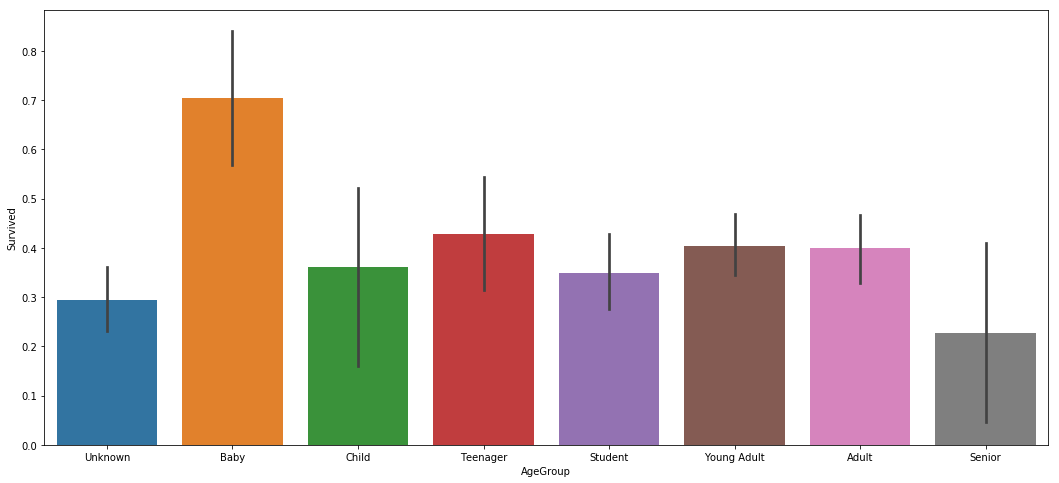

In [43]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'AgeGroup', y = 'Survived', data = train_titanic)
plt.show()

In [ ]:
mr_age = train_titanic[train_titanic['Title'] == 1] ['AgeGroup'].mode()#YoungAdult
miss_age = train_titanic[train_titanic['Title'] == 2]['AgeGroup'].mode()#student
mrs_age = train_titanic[train_titanic['Title'] ==3]['AgeGroup'].mode()#Adult
master_age = train_titanic[train_titanic['Title'] == 4]['AgeG']